In [2]:
# Fetch data from NYT API using requests

# import requests
# import json 

# base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
# query = 'mike+pence'
# key = 'd6a6c22e607c430bbc79428541bcb0ff'

# for i in range (0,120):
#     url = base_url+'?&q='+query+'&page='+str(i)+'&api-key='+key
#     r = requests.get(url)
#     data = r.json()
#     json.dump(data,open("mike_pence_data_0304_page"+str(i)+".json",'w'))
    

hello


In [37]:
# Read JSON Data

import os
import json
import os.path
import glob

try:
    os.chdir('C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/')
except:
    pass


raw_data_snippet=[]
raw_data_lead=[]
              
file_list = glob.glob("midterm\\data\\Question2\\trump\\*.json")

data = []
for js in file_list:
    with open(js) as f:
        for line in f:
            data.append(json.loads(line))
    

    for j in range(len(data)):
        for k in range(len((data[j]['response']['docs']))):
            raw_snippet = (data[j]['response']['docs'][k]['snippet'])
            raw_lead = (data[j]['response']['docs'][k]['lead_paragraph'])
            try:
                raw_data_lead.append(raw_lead.lower())
                raw_data_snippet.append(raw_snippet.lower())   
            except:
                pass
            
            
print(len(raw_data_snippet))  

10305


In [38]:
# Data cleaning
import re
regex = re.compile("[^a-zA-Z\s.]")

snippet_clean = []
for x in raw_data_snippet:
    snippet_clean.append(regex.sub('', x))  # Regex to clean the corpus    

lead_clean = []
for x in raw_data_lead:
    lead_clean.append(regex.sub('', x))  # Regex to clean the corpus    


In [39]:
# Tokenize words
import re
import nltk
reg = re.compile("[^a-zA-Z\s]")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words("english"))
fin_snippet = ''.join(snippet_clean)

tokens = nltk.word_tokenize(fin_snippet)
wnl = nltk.WordNetLemmatizer()
lem_snippet = [wnl.lemmatize(t) for t in tokens]

lem_snippet_clean=[]
for x in lem_snippet:
    lem_snippet_clean.append(reg.sub('', x))  # Regex to clean the corpus 

lem_snippet_clean2 = [x for x in lem_snippet_clean if x]
filtered_snippet = [w for w in lem_snippet_clean2 if not w in stop_words]


In [42]:
# Build Positive & Negative Word Dictionary
# import urllib.request

# url='http://www.unc.edu/~ncaren/haphazard/negative.txt'
# file_name='negative.txt'
# urllib.request.urlretrieve(url,file_name)

neg_sent = open("midterm\\data\\Question2\\negative.txt").read()
negative_words=neg_sent.split('\n')

# url='http://www.unc.edu/~ncaren/haphazard/positive.txt'
# file_name='positive.txt'
# urllib.request.urlretrieve(url,file_name)

pos_sent = open("midterm\\data\\Question2\\positive.txt").read()
positive_words=pos_sent.split('\n')


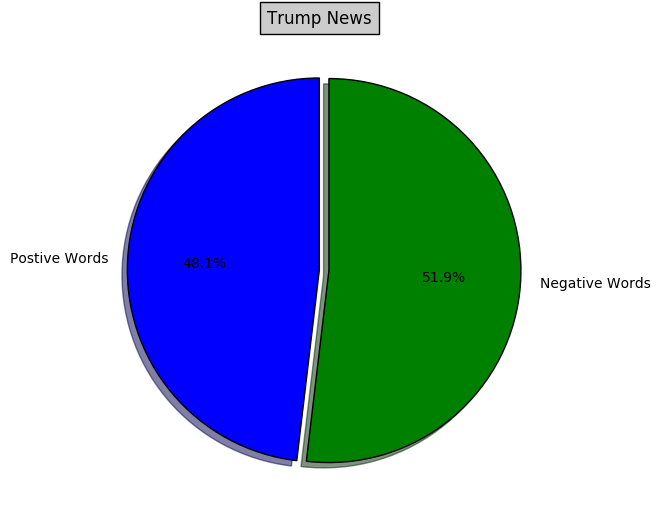

In [43]:
# Sentiment Analysis
word_count_snippet=len(filtered_snippet)

positive_counter=0
negative_counter=0
word_count=len(filtered_snippet)

for word in filtered_snippet:
    if word in positive_words:
        positive_counter=positive_counter+1
    elif word in negative_words:
        negative_counter=negative_counter+1
        
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Postive Words', 'Negative Words'
fracs = [positive_counter, negative_counter]
explode=(0, 0.05)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
               
title('Trump News', bbox={'facecolor':'0.8', 'pad':5})
show()

